<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-timeseries-from-BP12-and-OBS" data-toc-modified-id="Read-timeseries-from-BP12-and-OBS-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read timeseries from BP12 and OBS</a></span><ul class="toc-item"><li><span><a href="#[-Function-read-timeseries-and-plot-titles]" data-toc-modified-id="[-Function-read-timeseries-and-plot-titles]-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>[ Function read timeseries and plot titles]</a></span></li><li><span><a href="#Dyn" data-toc-modified-id="Dyn-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Dyn</a></span></li><li><span><a href="#CO2" data-toc-modified-id="CO2-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>CO2</a></span></li><li><span><a href="#DIC/Alk" data-toc-modified-id="DIC/Alk-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>DIC/Alk</a></span></li><li><span><a href="#BGC" data-toc-modified-id="BGC-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>BGC</a></span></li><li><span><a href="#Plotting-functions" data-toc-modified-id="Plotting-functions-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Plotting functions</a></span></li></ul></li><li><span><a href="#Plot-biome-climatology" data-toc-modified-id="Plot-biome-climatology-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot biome climatology</a></span></li></ul></div>

# Plot biome seasonal cycle of surface variables: BIOPERIANT12 vs OBS

Plot climatological seasonal cycle of selected model variables averaged with grid size weighting over biomes 15 to 17.

In [1]:
import sys
import os
src_path = os.path.abspath(os.path.join(os.getcwd(), '../src'))
sys.path.append(src_path)
import bp12_tools as bp12
import bp12_tools.plot_utils as pu

import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

---

## Read timeseries from BP12 and OBS

### [ Function read timeseries and plot titles]

In [2]:
def get_biomets(vname_mdl, vname_obs):
    '''
    Read: timeseries for model and obs
    Make: plot title and color bar title
    return above
    '''
    var_mdl = xr.open_dataset(f"../data/TIMESERIES/BIOPERIANT12_timeseries_{vname_mdl}_meanbiome_clim.nc")
    var_obs = xr.open_dataset(f"../data/TIMESERIES/OBS_timeseries_{vname_obs}_meanbiome_clim.nc")
    varunit = pu.formatting.get_unit_mplstr(bp12.model_utils.get_varinfo(vname_mdl,'unit'))
    varname = pu.formatting.get_name_mplstr(bp12.model_utils.get_varinfo(vname_mdl,'long_name'))
    var_cblabel = f"{varname} {varunit}"
    return var_mdl, var_obs, var_cblabel 

### Dyn

In [3]:
t_mdl, t_obs, t_cbar = get_biomets("votemper", "T")
s_mdl, s_obs, s_cbar = get_biomets("vosaline", "S")
mld_mdl, mld_obs, mld_cbar = get_biomets("somxl010", "MLD")

### CO2

In [4]:
pco2_mdl, pco2_obs, pco2_cbar = get_biomets("pco2", "pco2")
fco2_mdl, fco2_obs, fco2_cbar = get_biomets("FCO2", "fco2")

### DIC/Alk

In [5]:
dic_mdl, dic_obs, dic_cbar = get_biomets("DIC", "DIC")
alk_mdl, alk_obs, alk_cbar = get_biomets("Alkalini", "TAlk")

In [6]:
TACT_title = "TA/DIC" #"Tot. Alkalinity/Dissolved Inorganic C"

TA15_mdl = alk_mdl.Alkalini15_mean
TA16_mdl = alk_mdl.Alkalini16_mean
TA17_mdl = alk_mdl.Alkalini17_mean
CT15_mdl = dic_mdl.DIC15_mean
CT16_mdl = dic_mdl.DIC16_mean
CT17_mdl = dic_mdl.DIC17_mean
TACT15_mdl = TA15_mdl/CT15_mdl
TACT16_mdl = TA16_mdl/CT16_mdl
TACT17_mdl = TA17_mdl/CT17_mdl

TA15_obs = alk_obs.TAlk15_mean.expand_dims(dim={"time": 12})
TA16_obs = alk_obs.TAlk16_mean.expand_dims(dim={"time": 12})
TA17_obs = alk_obs.TAlk17_mean.expand_dims(dim={"time": 12})
CT15_obs = dic_obs.DIC15_mean.expand_dims(dim={"time": 12})
CT16_obs = dic_obs.DIC16_mean.expand_dims(dim={"time": 12})
CT17_obs = dic_obs.DIC17_mean.expand_dims(dim={"time": 12})
TACT15_obs = TA15_obs/CT15_obs
TACT16_obs = TA16_obs/CT16_obs
TACT17_obs = TA17_obs/CT17_obs

### BGC

In [7]:
chl_mdl, chl_obs, chl_cbar = get_biomets("chl", "chl")
no3_mdl, no3_obs, no3_cbar = get_biomets("NO3", "NO3")
po4_mdl, po4_obs, po4_cbar = get_biomets("PO4", "PO4")
o2_mdl, o2_obs, o2_cbar = get_biomets("O2", "O2")
si_mdl, si_obs, si_cbar = get_biomets("Si", "Si")

# PLOT

### Plotting functions

In [8]:
def tsplot_1bvar(mean_obs, mean_mdl, biomenum, addstd=0, std_obs=None, std_mdl=None):
   
    global ymin_arr, ymax_arr
    colr = pu.formatting.get_biome_colors(biomenum)
    
    mean_obs_jj = np.concatenate((mean_obs.values[6:], mean_obs.values[:6]))
    mean_mdl_jj = np.concatenate((mean_mdl.values[6:], mean_mdl.values[:6]))
    ax.plot(range(12), mean_obs_jj, c=colr, lw=3, ls='--')
    ax.plot(range(12), mean_mdl_jj, c=colr, lw=2)
    if (addstd>0) and (std_mdl is not None):
        std_obs_jj = np.concatenate((std_obs.values[6:], std_obs.values[:6]))
        std_mdl_jj = np.concatenate((std_mdl.values[6:], std_mdl.values[:6]))
        ax.fill_between(range(12), mean_mdl_jj-std_mdl_jj, mean_mdl_jj+std_mdl_jj,
                             color=colr, alpha=0.2) 
    
    ymin_arr = np.concatenate((ymin_arr, mean_obs.values, mean_mdl.values))
    ymax_arr = np.concatenate((ymax_arr, mean_obs.values, mean_mdl.values))
    ax.set_rasterized(True)

    
def tsplotdeco_ts_allbiomes(titlein, ymin_in, ymax_in, annstr, precision=None):
    fsz=12 # annotation font size
    
    ax.set_xlim(0, 11)
    ax.xaxis.set_ticks(range(12))
    ax.xaxis.set_ticklabels(['J', 'A', 'S', 'O', 'N', 'D', 'J', 'F', 'M', 'A', 'M', 'J'],
                           fontsize=12)
    if precision is not None:
        ax.set_ylim(pu.formatting.get_xylim(ymin_in, ymax_in, precision))
        if precision==1: ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        if precision==2: ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        if precision==3: ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    else:
        ax.set_ylim((ymin_in, ymax_in))
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_ylabel(titlein, labelpad=10, fontsize=12)
    ax.grid(lw=1, c='0.75', alpha=0.4)
    plt.title(annstr, fontsize=12, loc='left')
    #ax.annotate(annstr, xy=(0, 1.03), xycoords=ax.transAxes, fontsize=fsz,
    #            bbox=dict(boxstyle="round", fc="w", lw=0, linestyle=None))



## Plot biome climatology

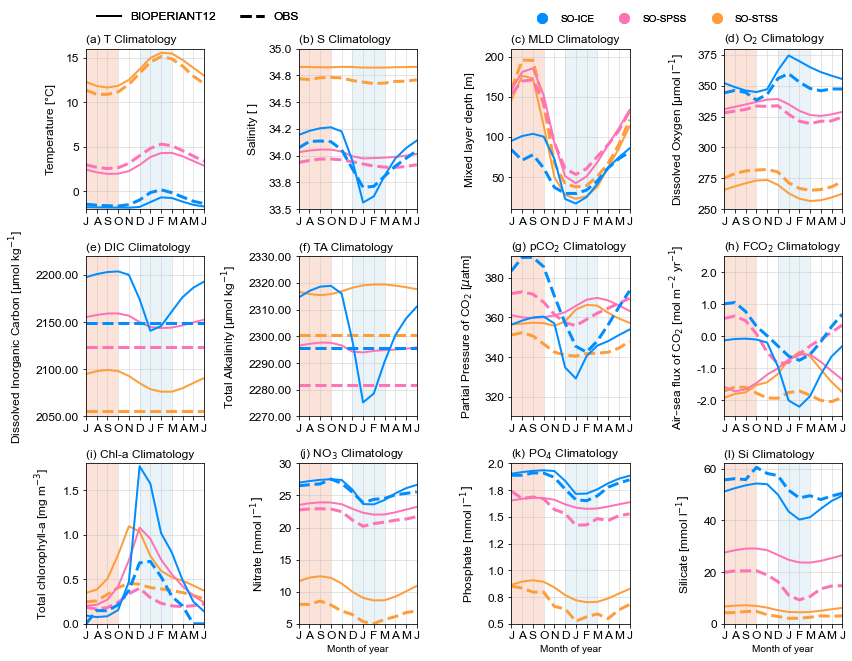

In [9]:
plt.rc('font', size=12)
fig = plt.figure(figsize=[12, 9])
z_ts=0
plot_std = 0

#------------------------ ROW 1 ------------------------
ax = fig.add_subplot(3,4,1)
ymin_arr, ymax_arr = [0], [0] 
tsplot_1bvar(t_obs.T15_mean.sel(depth=z_ts, method='nearest'), t_mdl.votemper15_mean.sel(deptht=z_ts, method='nearest'), 
             15, plot_std,
            t_obs.T15_std.sel(depth=z_ts, method='nearest'), t_mdl.votemper15_std.sel(deptht=z_ts, method='nearest'))
tsplot_1bvar(t_obs.T16_mean.sel(depth=z_ts, method='nearest'), t_mdl.votemper16_mean.sel(deptht=z_ts, method='nearest'), 
             16, plot_std,
            t_obs.T16_std.sel(depth=z_ts, method='nearest'), t_mdl.votemper16_std.sel(deptht=z_ts, method='nearest'))
tsplot_1bvar(t_obs.T17_mean.sel(depth=z_ts, method='nearest'), t_mdl.votemper17_mean.sel(deptht=z_ts, method='nearest'), 
             17, plot_std,
             t_obs.T17_std.sel(depth=z_ts, method='nearest'), t_mdl.votemper17_std.sel(deptht=z_ts, method='nearest'))
tsplotdeco_ts_allbiomes(t_cbar, np.nanmin(ymin_arr), np.nanmax(ymax_arr), f'(a) T Climatology', 0)
_, _, ymin, ymax = ax.axis()
pu.timeseries.add_seas(ax, (ymin, ymax), is_clim=True, add_legend=False)
pu.timeseries.add_omlegend(ax, (0.0, 1.1, 0.3, 0.2))

ax = fig.add_subplot(3,4,2)
ymin_arr, ymax_arr = [33.5], [35]  
tsplot_1bvar(s_obs.S15_mean.sel(depth=z_ts, method='nearest'), s_mdl.vosaline15_mean.sel(deptht=z_ts, method='nearest'), 
             15, plot_std,
            s_obs.S15_std.sel(depth=z_ts, method='nearest'), s_mdl.vosaline15_std.sel(deptht=z_ts, method='nearest'))
tsplot_1bvar(s_obs.S16_mean.sel(depth=z_ts, method='nearest'), s_mdl.vosaline16_mean.sel(deptht=z_ts, method='nearest'), 
             16, plot_std,
            s_obs.S16_std.sel(depth=z_ts, method='nearest'), s_mdl.vosaline16_std.sel(deptht=z_ts, method='nearest'))
tsplot_1bvar(s_obs.S17_mean.sel(depth=z_ts, method='nearest'), s_mdl.vosaline17_mean.sel(deptht=z_ts, method='nearest'), 
             17, plot_std,
             s_obs.S17_std.sel(depth=z_ts, method='nearest'), s_mdl.vosaline17_std.sel(deptht=z_ts, method='nearest'))
tsplotdeco_ts_allbiomes(s_cbar, np.nanmin(ymin_arr), np.nanmax(ymax_arr), f'(b) S Climatology', 1)
_, _, ymin, ymax = ax.axis()
pu.timeseries.add_seas(ax, (ymin, ymax), is_clim=True, add_legend=False)

ax = fig.add_subplot(3,4,3)
ymin_arr, ymax_arr = [10], [210]  
tsplot_1bvar(mld_obs.MLD15_mean, mld_mdl.somxl01015_mean, 15, plot_std, mld_obs.MLD15_std, mld_mdl.somxl01015_std)
tsplot_1bvar(mld_obs.MLD16_mean, mld_mdl.somxl01016_mean, 16, plot_std, mld_obs.MLD16_std, mld_mdl.somxl01016_std)
tsplot_1bvar(mld_obs.MLD17_mean, mld_mdl.somxl01017_mean, 17, plot_std, mld_obs.MLD17_std, mld_mdl.somxl01017_std)
tsplotdeco_ts_allbiomes(mld_cbar, np.nanmin(ymin_arr), np.nanmax(ymax_arr), f'(c) MLD Climatology', 0)
_, _, ymin, ymax = ax.axis()
pu.timeseries.add_seas(ax, (ymin, ymax), is_clim=True, add_legend=False)
pu.timeseries.add_biome_legend(ax, (0.1, 1.1), 3)

ax = fig.add_subplot(3,4,4)
ymin_arr, ymax_arr = [250], [380]  
tsplot_1bvar(o2_obs.O215_mean.sel(depth=z_ts, method='nearest'), o2_mdl.O215_mean.sel(deptht=z_ts, method='nearest'),
             15, plot_std, o2_obs.O215_std.sel(depth=z_ts, method='nearest'), o2_mdl.O215_std.sel(deptht=z_ts, method='nearest'))
tsplot_1bvar(o2_obs.O216_mean.sel(depth=z_ts, method='nearest'), o2_mdl.O216_mean.sel(deptht=z_ts, method='nearest'),
             16, plot_std, o2_obs.O216_std.sel(depth=z_ts, method='nearest'), o2_mdl.O216_std.sel(deptht=z_ts, method='nearest'))
tsplot_1bvar(o2_obs.O217_mean.sel(depth=z_ts, method='nearest'), o2_mdl.O217_mean.sel(deptht=z_ts, method='nearest'),
             17, plot_std, o2_obs.O217_std.sel(depth=z_ts, method='nearest'), o2_mdl.O217_std.sel(deptht=z_ts, method='nearest'))
tsplotdeco_ts_allbiomes(o2_cbar, np.nanmin(ymin_arr), np.nanmax(ymax_arr), f'(d) O$_2$ Climatology', 0)
_, _, ymin, ymax = ax.axis()
pu.timeseries.add_seas(ax, (ymin, ymax), is_clim=True, add_legend=False)

#------------------------ ROW 2 ------------------------

ax = fig.add_subplot(3,4,5)
ymin_arr, ymax_arr = [2050], [2220]  
tsplot_1bvar(CT15_obs.sel(depth=z_ts, method='nearest'), CT15_mdl.sel(deptht=z_ts, method='nearest'), 15)
tsplot_1bvar(CT16_obs.sel(depth=z_ts, method='nearest'), CT16_mdl.sel(deptht=z_ts, method='nearest'), 16)
tsplot_1bvar(CT17_obs.sel(depth=z_ts, method='nearest'), CT17_mdl.sel(deptht=z_ts, method='nearest'), 17)
tsplotdeco_ts_allbiomes(dic_cbar, np.nanmin(ymin_arr), np.nanmax(ymax_arr), '(e) DIC Climatology')
_, _, ymin, ymax = ax.axis()
pu.timeseries.add_seas(ax, (ymin, ymax), is_clim=True, add_legend=False)

ax = fig.add_subplot(3,4,6)
ymin_arr, ymax_arr = [2270], [2330]  
tsplot_1bvar(TA15_obs.sel(depth=z_ts, method='nearest'), TA15_mdl.sel(deptht=z_ts, method='nearest'), 15)
tsplot_1bvar(TA16_obs.sel(depth=z_ts, method='nearest'), TA16_mdl.sel(deptht=z_ts, method='nearest'), 16)
tsplot_1bvar(TA17_obs.sel(depth=z_ts, method='nearest'), TA17_mdl.sel(deptht=z_ts, method='nearest'), 17)
tsplotdeco_ts_allbiomes(alk_cbar, np.nanmin(ymin_arr), np.nanmax(ymax_arr), '(f) TA Climatology')
_, _, ymin, ymax = ax.axis()
pu.timeseries.add_seas(ax, (ymin, ymax), is_clim=True, add_legend=False)

ax = fig.add_subplot(3,4,7)
ymin_arr, ymax_arr = [310], [390]  
tsplot_1bvar(pco2_obs.pco215_mean, pco2_mdl.pco215_mean, 15, plot_std, pco2_obs.pco215_std, pco2_mdl.pco215_std)
tsplot_1bvar(pco2_obs.pco216_mean, pco2_mdl.pco216_mean, 16, plot_std, pco2_obs.pco216_std, pco2_mdl.pco216_std)
tsplot_1bvar(pco2_obs.pco217_mean, pco2_mdl.pco217_mean, 17, plot_std, pco2_obs.pco217_std, pco2_mdl.pco217_std)
tsplotdeco_ts_allbiomes(pco2_cbar, np.nanmin(ymin_arr), np.nanmax(ymax_arr), f'(g) pCO$_2$ Climatology', 0)
_, _, ymin, ymax = ax.axis()
pu.timeseries.add_seas(ax, (ymin, ymax), is_clim=True, add_legend=False)

ax = fig.add_subplot(3,4,8)
ymin_arr, ymax_arr = [-2.5], [2.5]  
tsplot_1bvar(fco2_obs.fco215_mean, fco2_mdl.FCO215_mean, 15, plot_std, fco2_obs.fco215_std, fco2_mdl.FCO215_std)
tsplot_1bvar(fco2_obs.fco216_mean, fco2_mdl.FCO216_mean, 16, plot_std, fco2_obs.fco216_std, fco2_mdl.FCO216_std)
tsplot_1bvar(fco2_obs.fco217_mean, fco2_mdl.FCO217_mean, 17, plot_std, fco2_obs.fco217_std, fco2_mdl.FCO217_std)
tsplotdeco_ts_allbiomes(fco2_cbar, np.nanmin(ymin_arr), np.nanmax(ymax_arr), f'(h) FCO$_2$ Climatology', 1)
_, _, ymin, ymax = ax.axis()
pu.timeseries.add_seas(ax, (ymin, ymax), is_clim=True, add_legend=False)


#------------------------ ROW 3 ------------------------
ax = fig.add_subplot(3,4,9)
ymin_arr, ymax_arr = [0], [0.8] #[1.8]  
tsplot_1bvar(chl_obs.chl15_mean, chl_mdl.chl15_mean.sel(deptht=z_ts, method='nearest'), 
             15, plot_std,
             chl_obs.chl15_std, chl_mdl.chl15_std.sel(deptht=z_ts, method='nearest'))
tsplot_1bvar(chl_obs.chl16_mean, chl_mdl.chl16_mean.sel(deptht=z_ts, method='nearest'), 
             16, plot_std,
             chl_obs.chl16_std, chl_mdl.chl16_std.sel(deptht=z_ts, method='nearest'))
tsplot_1bvar(chl_obs.chl17_mean, chl_mdl.chl17_mean.sel(deptht=z_ts, method='nearest'), 
             17, plot_std,chl_obs.chl17_std, chl_mdl.chl17_std.sel(deptht=z_ts, method='nearest'))
tsplotdeco_ts_allbiomes(chl_cbar, np.nanmin(ymin_arr), np.nanmax(ymax_arr), f'(i) Chl-a Climatology', 1)
_, _, ymin, ymax = ax.axis()
pu.timeseries.add_seas(ax, (ymin, ymax), is_clim=True, add_legend=False)

ax = fig.add_subplot(3,4,10)
ymin_arr, ymax_arr = [5], [30]  
tsplot_1bvar(no3_obs.NO315_mean.sel(depth=z_ts, method='nearest'), no3_mdl.NO315_mean.sel(deptht=z_ts, method='nearest'), 
             15, plot_std,
             no3_obs.NO315_std.sel(depth=z_ts, method='nearest'), no3_mdl.NO315_std.sel(deptht=z_ts, method='nearest'))
tsplot_1bvar(no3_obs.NO316_mean.sel(depth=z_ts, method='nearest'), no3_mdl.NO316_mean.sel(deptht=z_ts, method='nearest'), 
             16, plot_std,
             no3_obs.NO316_std.sel(depth=z_ts, method='nearest'), no3_mdl.NO316_std.sel(deptht=z_ts, method='nearest'))
tsplot_1bvar(no3_obs.NO317_mean.sel(depth=z_ts, method='nearest'), no3_mdl.NO317_mean.sel(deptht=z_ts, method='nearest'), 
             17, plot_std,
             no3_obs.NO317_std.sel(depth=z_ts, method='nearest'), no3_mdl.NO317_std.sel(deptht=z_ts, method='nearest'))
tsplotdeco_ts_allbiomes(no3_cbar, np.nanmin(ymin_arr), np.nanmax(ymax_arr), f'(j) NO$_3$ Climatology', 0)
_, _, ymin, ymax = ax.axis()
pu.timeseries.add_seas(ax, (ymin, ymax), is_clim=True, add_legend=False)
ax.set_xlabel("Month of year")

ax = fig.add_subplot(3,4,11)
ymin_arr, ymax_arr = [0.5], [2]  
tsplot_1bvar(po4_obs.PO415_mean.sel(depth=z_ts, method='nearest'), po4_mdl.PO415_mean.sel(deptht=z_ts, method='nearest'), 
             15, plot_std,
             po4_obs.PO415_std.sel(depth=z_ts, method='nearest'), po4_mdl.PO415_std.sel(deptht=z_ts, method='nearest'))
tsplot_1bvar(po4_obs.PO416_mean.sel(depth=z_ts, method='nearest'), po4_mdl.PO416_mean.sel(deptht=z_ts, method='nearest'), 
             16, plot_std,
             po4_obs.PO416_std.sel(depth=z_ts, method='nearest'), po4_mdl.PO416_std.sel(deptht=z_ts, method='nearest'))
tsplot_1bvar(po4_obs.PO417_mean.sel(depth=z_ts, method='nearest'), po4_mdl.PO417_mean.sel(deptht=z_ts, method='nearest'), 
             17, plot_std,
             po4_obs.PO417_std.sel(depth=z_ts, method='nearest'), po4_mdl.PO417_std.sel(deptht=z_ts, method='nearest'))
tsplotdeco_ts_allbiomes(po4_cbar, np.nanmin(ymin_arr), np.nanmax(ymax_arr), f'(k) PO$_4$ Climatology', 1)
_, _, ymin, ymax = ax.axis()
pu.timeseries.add_seas(ax, (ymin, ymax), is_clim=True, add_legend=False)
ax.set_xlabel("Month of year")

ax = fig.add_subplot(3,4,12)
ymin_arr, ymax_arr = [0], [62]  
tsplot_1bvar(si_obs.Si15_mean.sel(depth=z_ts, method='nearest'), si_mdl.Si15_mean.sel(deptht=z_ts, method='nearest'), 
             15, plot_std,
             si_obs.Si15_std.sel(depth=z_ts, method='nearest'), si_mdl.Si15_std.sel(deptht=z_ts, method='nearest'))
tsplot_1bvar(si_obs.Si16_mean.sel(depth=z_ts, method='nearest'), si_mdl.Si16_mean.sel(deptht=z_ts, method='nearest'), 
             16, plot_std,
             si_obs.Si16_std.sel(depth=z_ts, method='nearest'), si_mdl.Si16_std.sel(deptht=z_ts, method='nearest'))
tsplot_1bvar(si_obs.Si17_mean.sel(depth=z_ts, method='nearest'), si_mdl.Si17_mean.sel(deptht=z_ts, method='nearest'), 
             17, plot_std,
             si_obs.Si17_std.sel(depth=z_ts, method='nearest'), si_mdl.Si17_std.sel(deptht=z_ts, method='nearest'))
tsplotdeco_ts_allbiomes(si_cbar, np.nanmin(ymin_arr), np.nanmax(ymax_arr), f'(l) Si Climatology', 0)
_, _, ymin, ymax = ax.axis()
pu.timeseries.add_seas(ax, (ymin, ymax), is_clim=True, add_legend=False)
ax.set_xlabel("Month of year")
plt.tight_layout()
plt.savefig(f"../figures/f07.png", bbox_inches='tight')